   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
In

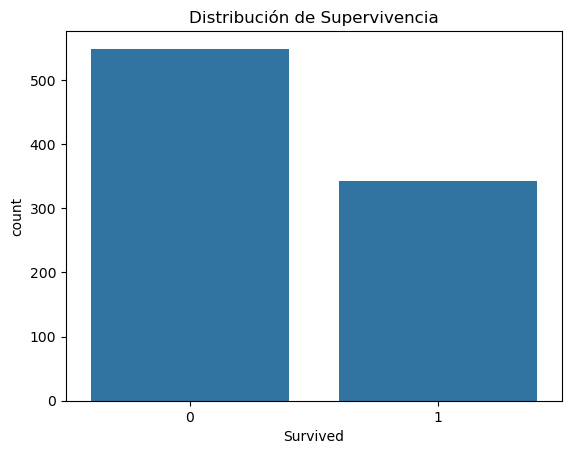

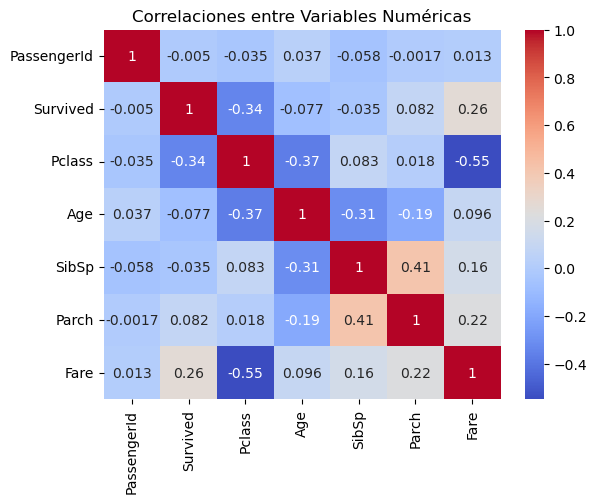

In [34]:
# Modelo seleccionado es : Regresión Logística


# 1. Análisis exploratorio de los datos (EDA)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
data = pd.read_csv("C:/Users/Javier Alexander Gar/Downloads/Mosquera tareas/ANÁLISIS DE DATOS/Tarea5/Anexo 6 - Dataset Titanic/Titanic-Dataset.csv")

# Verificar las primeras filas y las columnas
print(data.head())
print(data.columns)

# Resumen de estadísticas descriptivas
print(data.describe())

# Comprobar valores nulos
print(data.isnull().sum())

# Visualización de la distribución de la variable 'Survived'
sns.countplot(x='Survived', data=data)
plt.title('Distribución de Supervivencia')
plt.show()

# Seleccionar solo las columnas numéricas para la correlación
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Correlaciones entre las variables numéricas
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlaciones entre Variables Numéricas')
plt.show()


In [27]:
# Codificar la columna 'Embarked'
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Verificar las nuevas columnas
print(data.columns)



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [40]:
# 2. Preprocesamiento de los datos

# Rellenar los valores faltantes en 'Age' con la mediana
data['Age'] = data['Age'].fillna(data['Age'].median())

# Rellenar los valores faltantes en 'Embarked' con la moda
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Verificar que no hay valores nulos en las columnas procesadas
print(data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [46]:
# 3. Selección de características más relevantes para entrenar el modelo
# Seleccionar características
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']




In [47]:
# 4. Dividir el dataset en Train y Test
from sklearn.model_selection import train_test_split

# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# 5. Entrenar el modelo (Regresión Logística)
from sklearn.linear_model import LogisticRegression

# Inicializar y entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Precisión: 0.8100558659217877
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



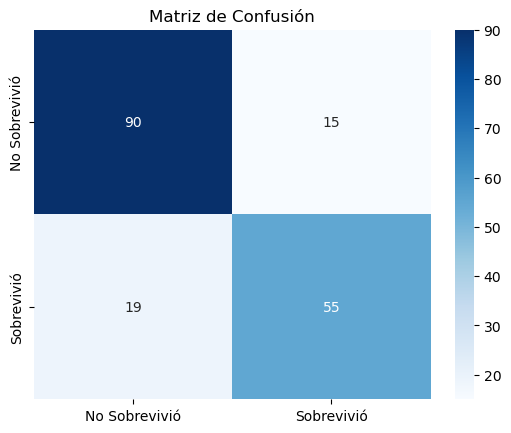

In [50]:
# 6. Evaluar el desempeño del modelo
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Realizar predicciones sobre el conjunto de test
y_pred = model.predict(X_test)

# Evaluar el desempeño del modelo
print("Precisión:", accuracy_score(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sobrevivió', 'Sobrevivió'], yticklabels=['No Sobrevivió', 'Sobrevivió'])
plt.title('Matriz de Confusión')
plt.show()


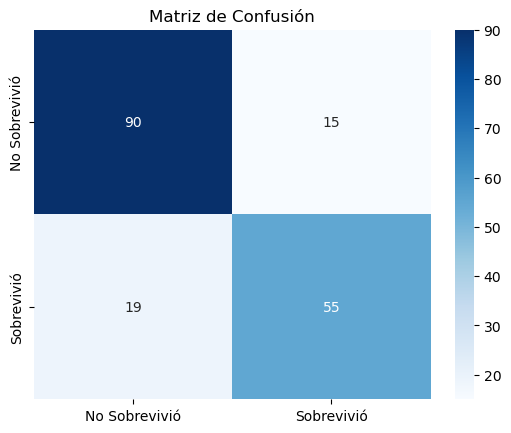

In [51]:
# Visualización de la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sobrevivió', 'Sobrevivió'], yticklabels=['No Sobrevivió', 'Sobrevivió'])
plt.title('Matriz de Confusión')
plt.show()
